In [1]:
pip install ai 

  Using cached ai-1.0.3.tar.gz (98 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [8 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\HP\AppData\Local\Temp\pip-install-92042tmv\ai_13dbcc6f7f244ec6961341a4e2f99e1a\setup.py", line 4, in <module>
          import ai
        File "C:\Users\HP\AppData\Local\Temp\pip-install-92042tmv\ai_13dbcc6f7f244ec6961341a4e2f99e1a\ai\__init__.py", line 3, in <module>
          import torch
      ModuleNotFoundError: No module named 'torch'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
pip install pydicom

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install nibabel

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pydicom

f = 'C:/Users/HP/OneDrive/Documents/Study/AI/data-20250404T030049Z-001/data/xray-chest.dcm'
dcm = pydicom.dcmread(f)
print(dcm)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 188
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.840.113564.172245035.2017020212140726562.1003000225002
(0002,0010) Transfer Syntax UID                 UI: RLE Lossless
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-2.0'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008,0016) SOP Class UID                       UI: Digital X-Ray Image Storage - For Presentation
(0008,0018) SOP Instance UID                    UI: 1.2.840.113564.172245035.2017020212140726562.1003000225002
(0008,0020) Study Dat

In [5]:
print(dcm['StudyDescription'])

(0008,1030) Study Description                   LO: 'CHEST PA ERECT'


In [6]:
val = dcm.XRayTubeCurrent * dcm.ExposureTime
print(f"{val/1000}mAs")

2.0mAs


(3032, 2520)


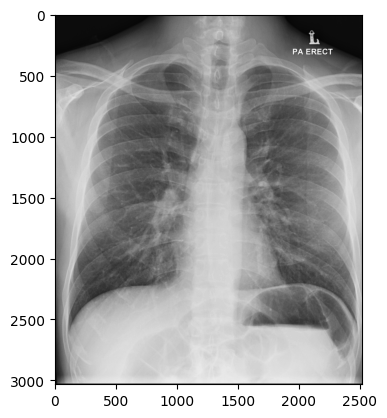

In [7]:
import matplotlib.pyplot as plt

img = dcm.pixel_array
print(img.shape)
plt.imshow(img, cmap="gray")

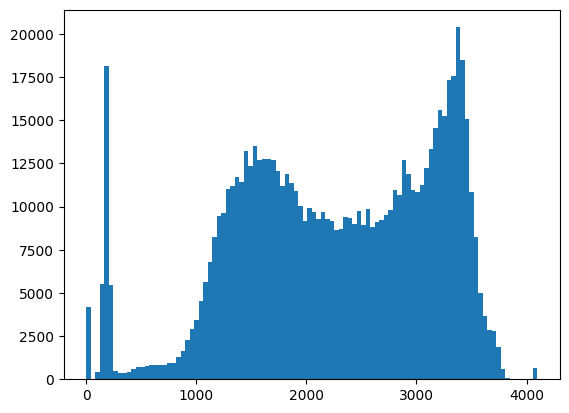

In [8]:
samples = img.flat[::10]
_ = plt.hist(samples,100)

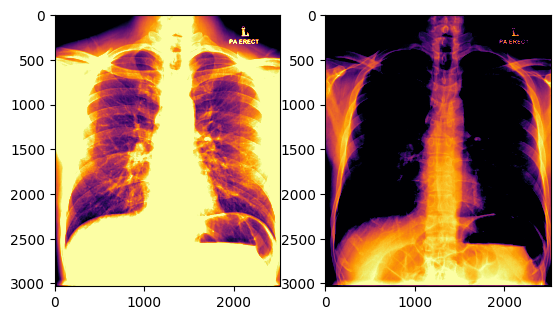

In [9]:
_, (ax1, ax2) = plt.subplots(ncols=2)
ax1.imshow(img, vmin = 700, vmax = 2500, cmap='inferno')
ax2.imshow(img, vmin = 2200, vmax = 3600, cmap='inferno')

In [10]:
from pathlib import Path
d_ct = Path("C:/Users/HP/OneDrive/Documents/Study/AI/data-20250404T030049Z-001/data/ct-head/ct-head")
f_lst = list(d_ct.glob("CT*"))
f_lst = sorted(f_lst)
print(f_lst)

[WindowsPath('C:/Users/HP/OneDrive/Documents/Study/AI/data-20250404T030049Z-001/data/ct-head/ct-head/CT000000.dcm'), WindowsPath('C:/Users/HP/OneDrive/Documents/Study/AI/data-20250404T030049Z-001/data/ct-head/ct-head/CT000001.dcm'), WindowsPath('C:/Users/HP/OneDrive/Documents/Study/AI/data-20250404T030049Z-001/data/ct-head/ct-head/CT000002.dcm'), WindowsPath('C:/Users/HP/OneDrive/Documents/Study/AI/data-20250404T030049Z-001/data/ct-head/ct-head/CT000003.dcm'), WindowsPath('C:/Users/HP/OneDrive/Documents/Study/AI/data-20250404T030049Z-001/data/ct-head/ct-head/CT000004.dcm'), WindowsPath('C:/Users/HP/OneDrive/Documents/Study/AI/data-20250404T030049Z-001/data/ct-head/ct-head/CT000005.dcm'), WindowsPath('C:/Users/HP/OneDrive/Documents/Study/AI/data-20250404T030049Z-001/data/ct-head/ct-head/CT000006.dcm'), WindowsPath('C:/Users/HP/OneDrive/Documents/Study/AI/data-20250404T030049Z-001/data/ct-head/ct-head/CT000007.dcm'), WindowsPath('C:/Users/HP/OneDrive/Documents/Study/AI/data-20250404T0300

In [11]:
import pydicom

dcm_lst = []
for f in f_lst:
    dcm = pydicom.dcmread(f)
    dcm_lst.append(dcm)
print(dcm_lst)

[Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 200
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.296485376.1.1521713596.1854366
(0002,0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.2
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_362'
-------------------------------------------------
(0008,0000) Group Length                        UL: 328
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008,0012) Instance Creation Date              DA: ''
(0008,0013) Instance Creation Time              TM: ''
(0008,0016) SOP Class UID                

In [12]:
import numpy as np
print(dcm_lst[0].ImagePositionPatient)

pos_lst = []
for dcm in dcm_lst:
    pos_lst.append(dcm.ImagePositionPatient)
pos_all = np.stack(pos_lst)
print(pos_all)

[-110.000, -137.100, 74.500]
[[-110.  -137.1   74.5]
 [-110.  -137.1   24.5]
 [-110.  -137.1  109.5]
 [-110.  -137.1  104.5]
 [-110.  -137.1  -10.5]
 [-110.  -137.1   29.5]
 [-110.  -137.1   44.5]
 [-110.  -137.1   99.5]
 [-110.  -137.1   14.5]
 [-110.  -137.1   84.5]
 [-110.  -137.1   94.5]
 [-110.  -137.1   39.5]
 [-110.  -137.1  -15.5]
 [-110.  -137.1   49.5]
 [-110.  -137.1   34.5]
 [-110.  -137.1  114.5]
 [-110.  -137.1  -30.5]
 [-110.  -137.1   79.5]
 [-110.  -137.1  124.5]
 [-110.  -137.1  119.5]
 [-110.  -137.1   64.5]
 [-110.  -137.1   54.5]
 [-110.  -137.1   89.5]
 [-110.  -137.1  -20.5]
 [-110.  -137.1   19.5]
 [-110.  -137.1    9.5]
 [-110.  -137.1   69.5]
 [-110.  -137.1   -5.5]
 [-110.  -137.1  -25.5]
 [-110.  -137.1   59.5]
 [-110.  -137.1    4.5]
 [-110.  -137.1   -0.5]]


In [13]:
dist = pos_all[0] - pos_all
print(dist)

[[  0.   0.   0.]
 [  0.   0.  50.]
 [  0.   0. -35.]
 [  0.   0. -30.]
 [  0.   0.  85.]
 [  0.   0.  45.]
 [  0.   0.  30.]
 [  0.   0. -25.]
 [  0.   0.  60.]
 [  0.   0. -10.]
 [  0.   0. -20.]
 [  0.   0.  35.]
 [  0.   0.  90.]
 [  0.   0.  25.]
 [  0.   0.  40.]
 [  0.   0. -40.]
 [  0.   0. 105.]
 [  0.   0.  -5.]
 [  0.   0. -50.]
 [  0.   0. -45.]
 [  0.   0.  10.]
 [  0.   0.  20.]
 [  0.   0. -15.]
 [  0.   0.  95.]
 [  0.   0.  55.]
 [  0.   0.  65.]
 [  0.   0.   5.]
 [  0.   0.  80.]
 [  0.   0. 100.]
 [  0.   0.  15.]
 [  0.   0.  70.]
 [  0.   0.  75.]]


In [14]:
dist = dist[:,2]
print(dist)

[  0.  50. -35. -30.  85.  45.  30. -25.  60. -10. -20.  35.  90.  25.
  40. -40. 105.  -5. -50. -45.  10.  20. -15.  95.  55.  65.   5.  80.
 100.  15.  70.  75.]


In [15]:
print(sorted(np.copy(dist)))

[np.float64(-50.0), np.float64(-45.0), np.float64(-40.0), np.float64(-35.0), np.float64(-30.0), np.float64(-25.0), np.float64(-20.0), np.float64(-15.0), np.float64(-10.0), np.float64(-5.0), np.float64(0.0), np.float64(5.0), np.float64(10.0), np.float64(15.0), np.float64(20.0), np.float64(25.0), np.float64(30.0), np.float64(35.0), np.float64(40.0), np.float64(45.0), np.float64(50.0), np.float64(55.0), np.float64(60.0), np.float64(65.0), np.float64(70.0), np.float64(75.0), np.float64(80.0), np.float64(85.0), np.float64(90.0), np.float64(95.0), np.float64(100.0), np.float64(105.0)]


In [16]:
idx = np.argsort(dist)
print(idx)

[18 19 15  2  3  7 10 22  9 17  0 26 20 29 21 13  6 11 14  5  1 24  8 25
 30 31 27  4 12 23 28 16]


In [17]:
print(dist[18])

-50.0


(512, 512, 32)


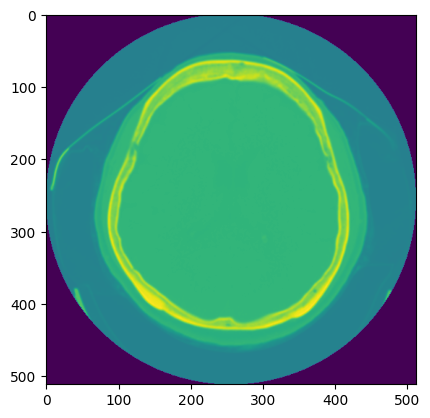

In [18]:
img_lst = []
for n in idx:
    img = dcm_lst[n].pixel_array
    img_lst.append(img)
vol = np.stack(img_lst, axis=2)
print(vol.shape)
plt.imshow(vol[:,:,16])

In [ ]:
import matplotlib.pyplot as plt
samples = vol.flat[::10]
_=

SyntaxError: invalid syntax (2425889655.py, line 3)

: 

1
-1024


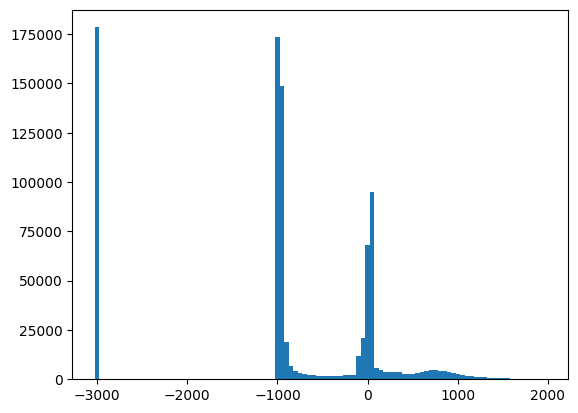

In [ ]:
print(dcm.RescaleSlope)
print(dcm.RescaleIntercept)
vol = vol.astype(float)
vol = vol * dcm.RescaleSlope + dcm.RescaleIntercept
samples = vol.flat[::10]
_ = plt.hist(samples, 100)

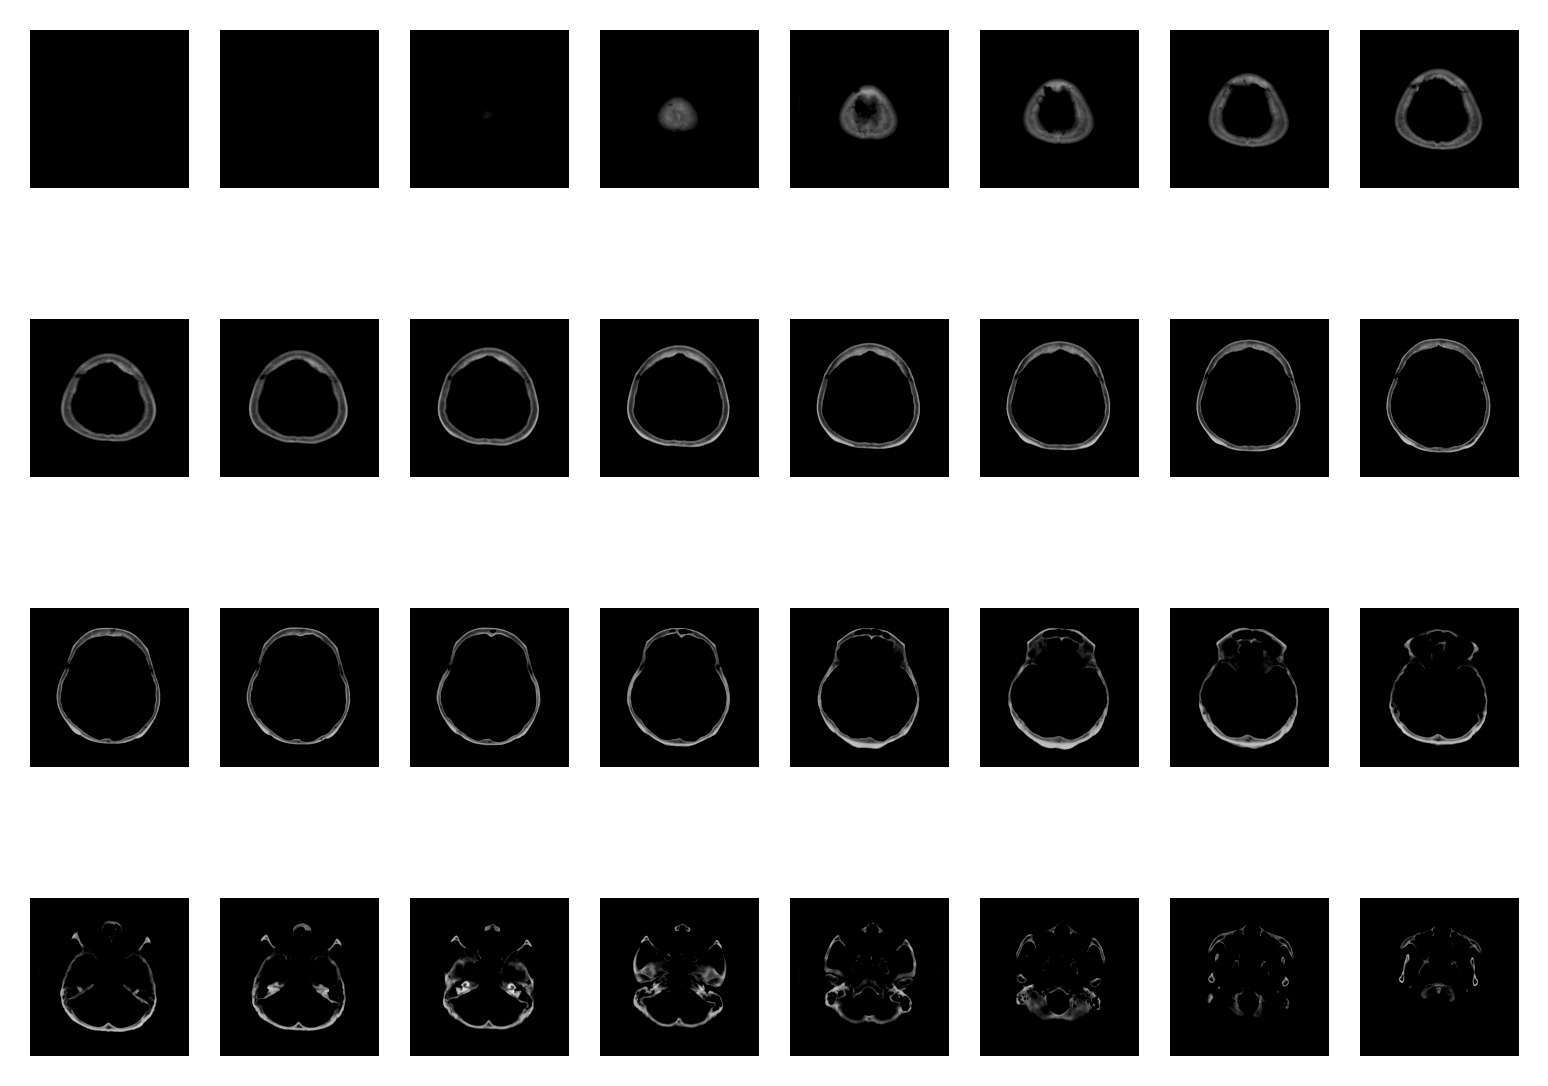

In [ ]:
_, ax_lst = plt.subplots(nrows = 4, ncols = 8, dpi = 300)
n = 0
for n_row in range(4):
    for n_col in range(8):
        ax = ax_lst[n_row][n_col]
        img = vol[:, :, n]
        ax.set_axis_off()
        ax.imshow(img, vmin=300, vmax=2000, cmap='gray')
        n += 1

In [ ]:
print(dcm.PixelSpacing)
print(dcm.SliceThickness)
print(dist[idx])

[0.429688, 0.429688]
5.000000
[-50. -45. -40. -35. -30. -25. -20. -15. -10.  -5.   0.   5.  10.  15.
  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.  75.  80.  85.
  90.  95. 100. 105.]


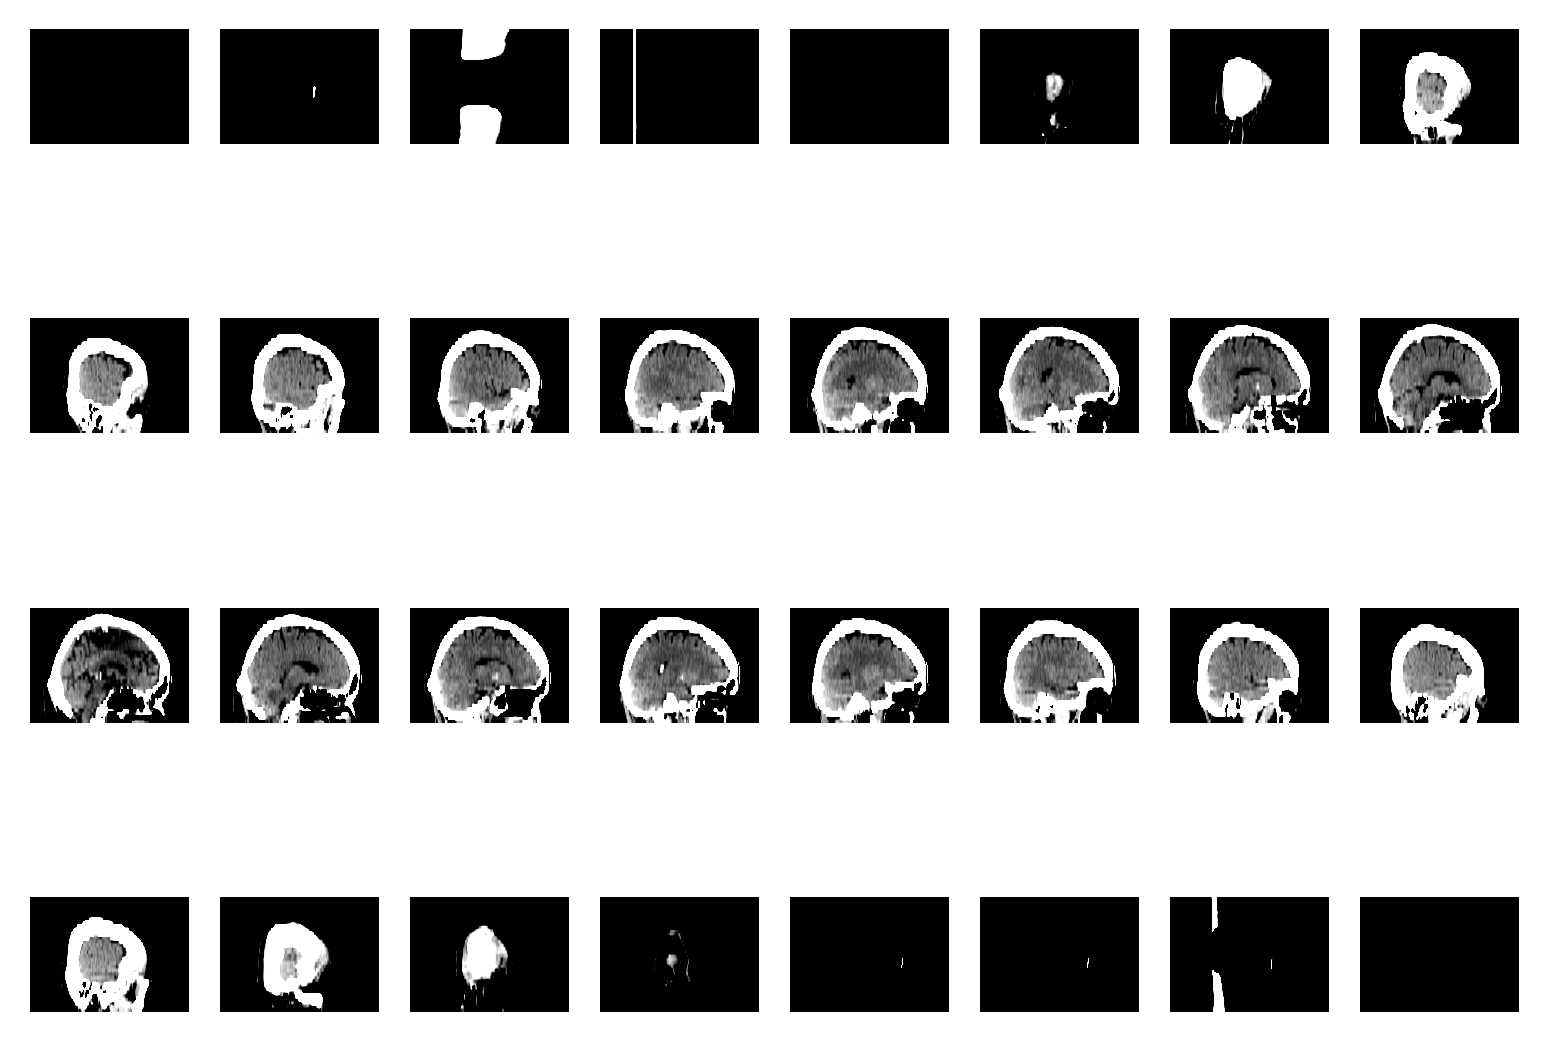

In [ ]:
_, ax_lst = plt.subplots(nrows = 4, ncols = 8, dpi = 300)
n = 0
for n_row in range(4):
    for n_col in range(8):
        ax = ax_lst[n_row][n_col]
        img = np.rot90(vol[:, n, :], k=3)
        ax.set_axis_off()
        ax.imshow(img, vmin=10, vmax=55, cmap='gray', aspect = 5/0.43)
        n += 16

In [ ]:
import nibabel as nib

nii = nib.load('C:/Users/HP/OneDrive/Documents/Study/AI/data-20250404T030049Z-001/data/mri-heart/mri-heart.nii')
print(nii)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (320, 320, 110)
affine:
[[1.25 0.   0.   0.  ]
 [0.   1.25 0.   0.  ]
 [0.   0.   1.37 0.  ]
 [0.   0.   0.   1.  ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 320 320 110   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.   1.25 1.25 1.37 0.   0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'5.0.10')
aux_file        :

In [ ]:
vol = nii.get_fdata()
print(vol.shape)

(320, 320, 110)


In [ ]:
print(nii.header['pixdim'])

[1.   1.25 1.25 1.37 0.   0.   0.   0.  ]


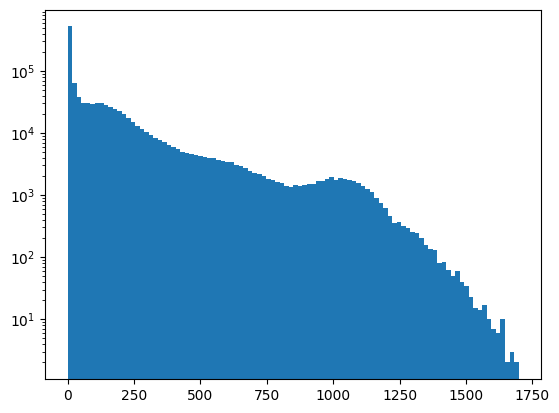

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

samples = [vol.flat[::10]]
_= plt.hist(samples, 100)
plt.yscale("log")

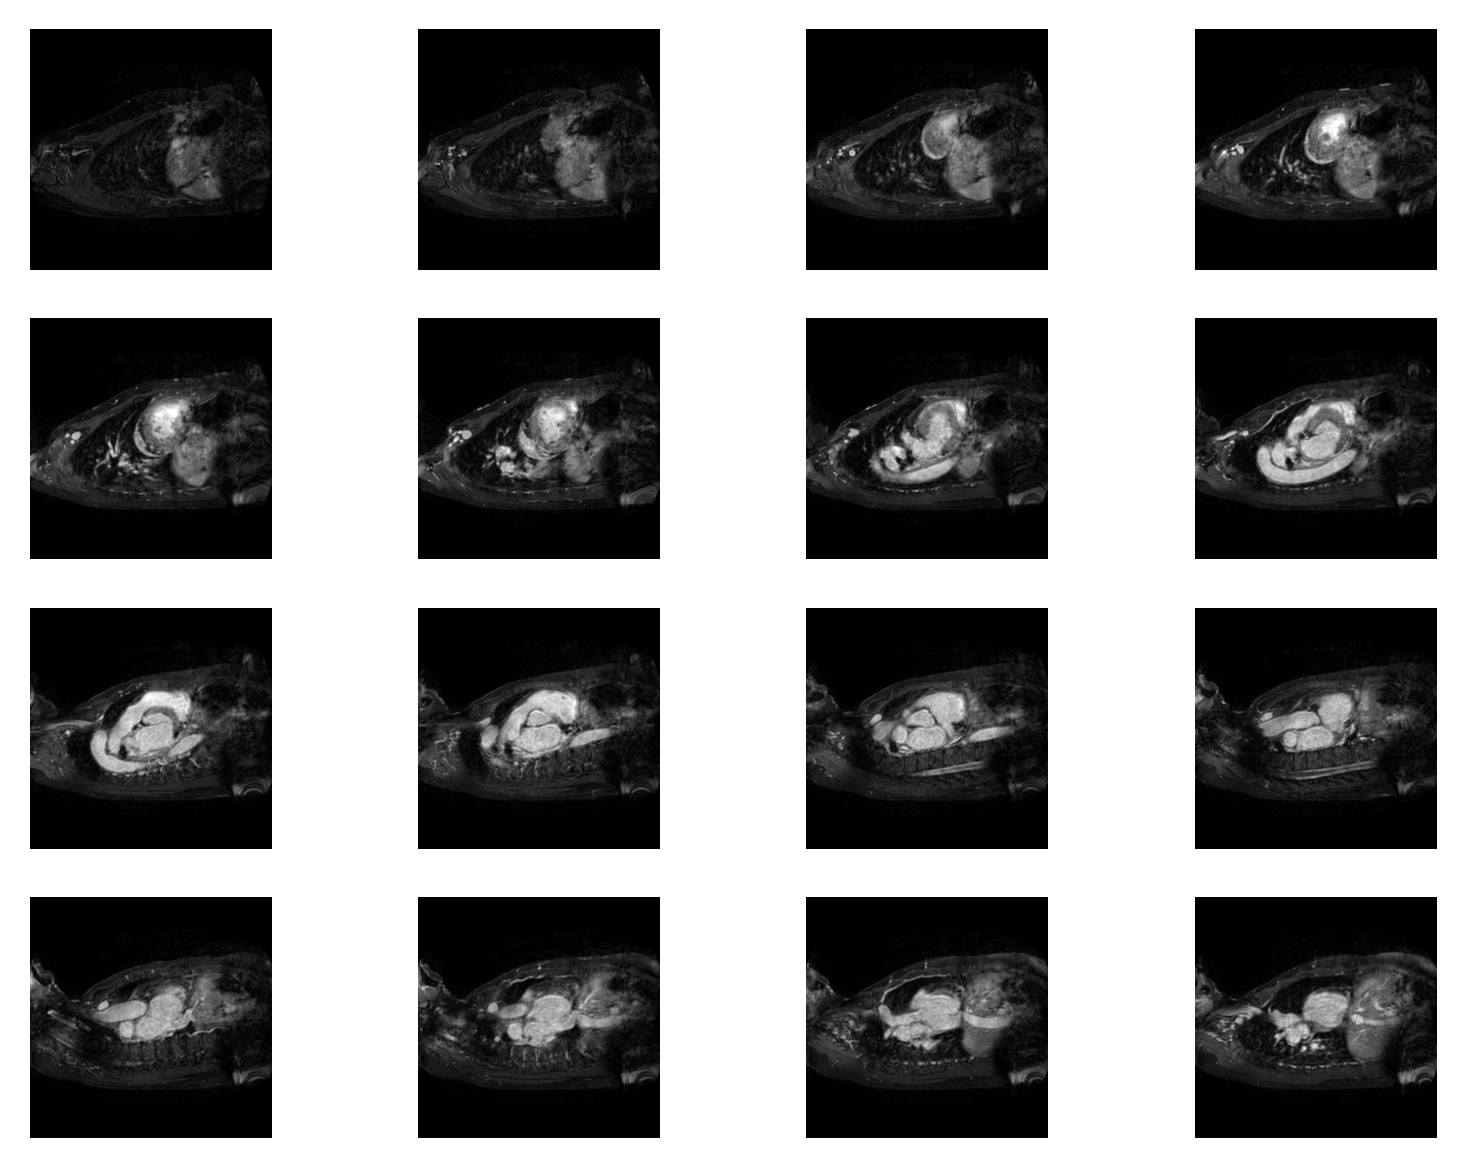

In [ ]:
_, ax_lst = plt.subplots(nrows = 4, ncols = 4, dpi = 300)
n = 0 
for n_row in range(4):
    for n_col in range(4): 
        ax = ax_lst[n_row][n_col]
        img = np.rot90(vol[:,:,n], k=2)
        ax.set_axis_off()
        ax.imshow(img, vmin = 0, vmax = 1500, cmap = 'gray')
        n += 6